In [3]:
import joblib
import matplotlib.pyplot as plt
#from quadratic_weighted_kappa_edit import quadratic_weighted_kappa, onehalf_weighted_kappa, weighted_matrix, onehalf_weighted_matrix, linear_weighted_kappa
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import krippendorff
from pyagree import bangdiwala_b, scott_pi

In [4]:
prev_list = []

acc_list = []
ck_list = []
lwk_list = []
qwk_list = []
scott_list = []
bang_list = []
krip_list = []

### Agreement Matrix

In [59]:
M = np.array([[42,7,6],[7,2,4],[6,4,22]])
M

array([[42,  7,  6],
       [ 7,  2,  4],
       [ 6,  4, 22]])

In [60]:
np.sum(M)

100

In [61]:
1772

1772

### Convert matrix to array of ratings

In [62]:
def extract_array_from_cm(cm, k):
    r1 = []
    r2 = []
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            if i == j:       
                for x in range(cm[i][j]):
                    r1.extend([k[i]])
                    r2.extend([k[j]])
            else:
                for x in range(cm[i][j]):            
                    r1.extend([k[i]])                
                    r2.extend([k[j]])
    return r1, r2

k = [1,2,3,4]
r1, r2 = extract_array_from_cm(M, k)

### Prepare array format for Krippendorff's alpha

In [63]:
r1_ = np.array(r1).reshape(1,-1)
r2_ = np.array(r2).reshape(1,-1)

r = np.concatenate((r1_,r2_), axis=0)
r

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3,
        3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [64]:
# M = np.array([[14,1,2,1],[5,12,3,4],[7,4,12,3],[6,7,5,14]])
# M

In [65]:
len(M)

3

### Prevalence

In [66]:
prevalence_list = []

for i in range(len(M) - 1):
    for j in range(i+1, len(M)):
        prevalence_list.append(abs(M[i][i] - M[j][j]))

prev = np.sum(prevalence_list)
prevalence = prev / (np.sum(M) * len(M) * (len(M)-1) / 2)
print(prevalence)

0.26666666666666666


In [67]:
prev_list

[0.0, 0.08, 0.13333333333333333, 0.18666666666666668]

In [68]:
prev_list.append(prevalence)
prev_list

[0.0, 0.08, 0.13333333333333333, 0.18666666666666668, 0.26666666666666666]

In [69]:
acc = accuracy_score(r1,r2)
ck = cohen_kappa_score(r1,r2)
lwk = cohen_kappa_score(r1, r2, weights='linear')
qwk = cohen_kappa_score(r1, r2, weights='quadratic')
scott = scott_pi(np.matrix(M))
bang = bangdiwala_b(M)
krip = krippendorff.alpha(r)

acc_list.append(acc)
ck_list.append(ck)
lwk_list.append(lwk)
qwk_list.append(qwk)
scott_list.append(scott)
bang_list.append(bang)
krip_list.append(krip)

In [75]:
ck_list

[0.4896427499249475,
 0.4821809320743222,
 0.4705699159140455,
 0.4528484068233022,
 0.41196817710134903]

In [76]:
lwk_list

[0.4832621882722984,
 0.499455930359086,
 0.5054826918942164,
 0.5080213903743316,
 0.5054826918942164]

In [71]:
qwk_list

[0.47690928112389774,
 0.5151683058595373,
 0.5352542822998274,
 0.5519139674817565,
 0.5716558560763677]

### Plot Agreement Metrics Comparison

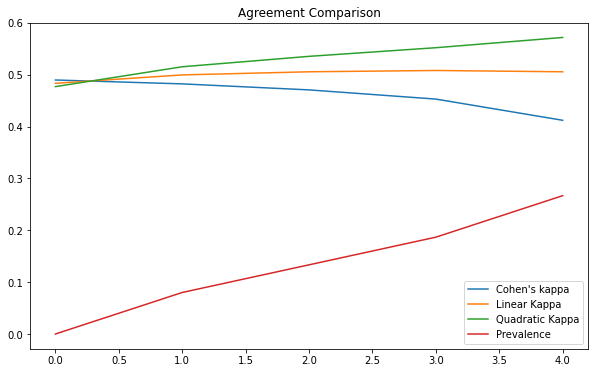

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Agreement Comparison")
#plt.plot(acc_list, label='Percent Agreement')
plt.plot(ck_list, label='Cohen\'s kappa')
plt.plot(lwk_list, label='Linear Kappa')
plt.plot(qwk_list, label='Quadratic Kappa')
#plt.plot(scott_list, label='Scott\'s PI')
#plt.plot(bang_list, label='Bangdiwala\'s B')
#plt.plot(krip_list, label='Krippendorff\'s alpha')
plt.plot(prev_list, label='Prevalence')
#plt.grid()
plt.legend()
#plt.savefig('comparison.png')

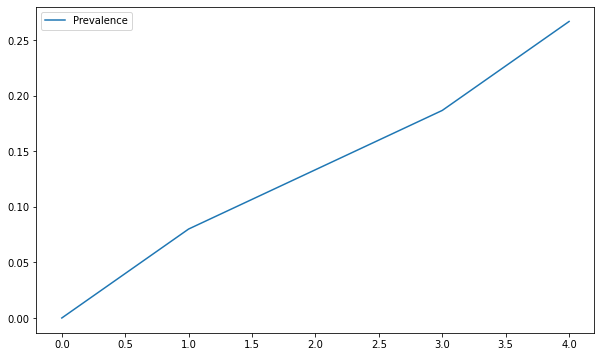

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(prev_list, label='Prevalence')
plt.legend()
#plt.savefig('comparison.png')

### Agreement Metrics

In [121]:
ck = cohen_kappa_score(r1,r2)
lwk = cohen_kappa_score(r1, r2, weights='linear')
qwk = cohen_kappa_score(r1, r2, weights='quadratic')
scott = scott_pi(np.matrix(M))
bang = bangdiwala_b(M)
krip = krippendorff.alpha(r)

print("Prevalance : ", np.round(prevalence,3))
print("===================")
print("Cohen's Kappa                  : ", np.round(ck,4))
print("Linear Weighted Kappa (LWK)    : ", np.round(lwk,4))
print("Quadratic Weighted Kappa (QWK) : ", np.round(qwk,4))
print("Scott's Pi                     : ", np.round(scott,4))
print("Bangdiwala's B                 : ", np.round(bang,4))
print("krippendorff's alpha           : ", np.round(krip,4))

Prevalance :  2.112
Cohen's Kappa                  :  0.5099
Linear Weighted Kappa (LWK)    :  0.6374
Quadratic Weighted Kappa (QWK) :  0.7649
Scott's Pi                     :  0.5086
Bangdiwala's B                 :  0.4556
krippendorff's alpha           :  0.765
